In [2]:
import matplotlib.pyplot as plt

In [3]:
def print_tsp_sample(file_path, num_lines=10):
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            if i >= num_lines:
                break
            print(line.strip())

file_path = 'zi929.tsp'
print_tsp_sample(file_path, num_lines=10)        

NAME : zi929
COMMENT : 929 locations in Zimbabwe
COMMENT : Derived from National Imagery and Mapping Agency data
TYPE : TSP
DIMENSION : 929
EDGE_WEIGHT_TYPE : EUC_2D
NODE_COORD_SECTION
1 15700.0000 30316.6667
2 16033.3333 28850.0000
3 16200.0000 31583.3333


In [4]:
def read_tsp_file(file_path):
    nodes = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        start_reading = False
        for line in lines:
            if "NODE_COORD_SECTION" in line:
                start_reading = True
                continue
            if start_reading:
                if line.strip() == "EOF":
                    break
                parts = line.split()
                node_id, x, y = int(parts[0]), float(parts[1]), float(parts[2])
                nodes.append((x, y))
    return nodes

In [37]:
def plot_tsp(nodes, show_path=False):
    x_coords, y_coords = zip(*nodes)
    plt.scatter(x_coords, y_coords, color='blue', label='Cities',s = 1)
        
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title("TSP Tour Visualization")
    plt.legend()
    plt.show()

In [6]:
file_path = 'zi929.tsp'
nodes = read_tsp_file(file_path)

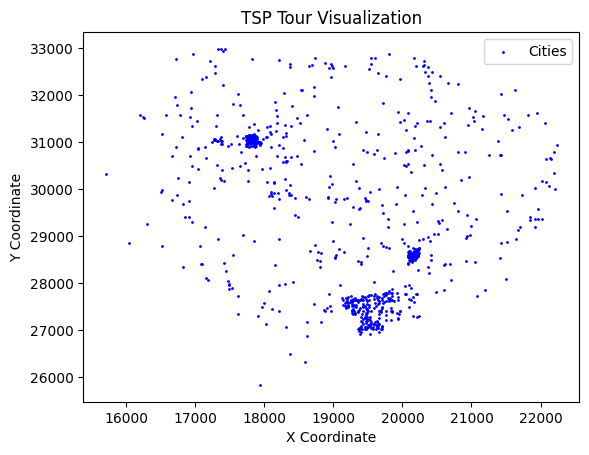

In [7]:
plot_tsp(nodes, show_path=True)

In [8]:
print(nodes)
print(len(nodes))

[(15700.0, 30316.6667), (16033.3333, 28850.0), (16200.0, 31583.3333), (16233.3333, 31533.3333), (16250.0, 31516.6667), (16300.0, 29250.0), (16500.0, 29933.3333), (16516.6667, 28800.0), (16516.6667, 29983.3333), (16516.6667, 31183.3333), (16566.6667, 31583.3333), (16666.6667, 29766.6667), (16666.6667, 30700.0), (16700.0, 31966.6667), (16716.6667, 30900.0), (16716.6667, 32766.6667), (16733.3333, 29883.3333), (16733.3333, 31783.3333), (16750.0, 30233.3333), (16783.3333, 31583.3333), (16800.0, 31116.6667), (16816.6667, 28350.0), (16816.6667, 29683.3333), (16850.0, 29416.6667), (16900.0, 29416.6667), (16900.0, 29750.0), (16900.0, 30150.0), (16916.6667, 30700.0), (16916.6667, 31533.3333), (16933.3333, 31716.6667), (16933.3333, 32066.6667), (16950.0, 29300.0), (16950.0, 30500.0), (16950.0, 31333.3333), (16966.6667, 32866.6667), (17016.6667, 31450.0), (17033.3333, 30433.3333), (17033.3333, 30850.0), (17033.3333, 30866.6667), (17066.6667, 28800.0), (17083.3333, 28400.0), (17100.0, 28400.0), (17

In [9]:
def find_distance(x1,y1,x2,y2):
    distance = (((x1-x2)**2)+((y1-y2)**2))**0.5
    return distance

In [10]:
box = []
num = len(nodes)
for i in range(num):
    arrey = []
    for j in range(num):
        arrey.append(find_distance(nodes[i][0],nodes[i][1],nodes[j][0],nodes[j][1]))
    box.append(arrey)

print(box[2])


[1361.7798190440155, 2738.409888562662, 0.0, 60.092502767733144, 83.33328000000706, 2335.4751741110167, 1677.0509831248423, 2801.2893563103707, 1631.0358055201887, 510.174282857232, 366.6667000000016, 1875.6479798844025, 999.0272908073025, 630.0353129433004, 856.6731452413923, 1291.2096709847162, 1781.6970586743664, 569.6002184768614, 1457.7379737113251, 583.3332999999984, 760.1169091367176, 3291.613897129761, 1997.567976037084, 2262.066346408864, 2276.937450953703, 1962.424772797389, 1595.1314519151344, 1137.4923638327334, 718.4087686609151, 745.3559716299645, 878.287483939314, 2403.354106012862, 1317.615664330417, 790.5694150420949, 1494.8988074262622, 827.4794666804622, 1420.1916732923366, 1110.0550066450649, 1099.1157375110424, 2915.142436962176, 3303.6175047631905, 3308.1128908924616, 1182.2765450134298, 2559.5680627359316, 1156.7434667106509, 3594.4787265409623, 1320.1430435962438, 1241.974234837422, 3651.559715305834, 1522.5162640985022, 1186.6151220078796, 1881.5626082830445, 1

In [113]:
import sys
class Graph():

    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]

    def printSolution(self, dist):
        print("Vertex \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", dist[node])
    
    def printWay(self,way):
        for node in range(self.V):
            print(node, "\t", way[node])
    def plotway(self,way,src,des=900):
        x_coords, y_coords = zip(*nodes)
        plt.scatter(x_coords, y_coords, color='blue',s = 0.3)
        plt.scatter(nodes[src][0],nodes[src][1],color = 'green',s = 10)
        plt.scatter(nodes[des][0],nodes[des][1],color = 'red',s = 10)
        """for i in way:
            x = []
            y = []
            for j in i:
                x.append(nodes[j][0])
                y.append(nodes[j][1])
            plt.plot(x,y,linewidth=0.5) """
        x = []
        y = []
        for j in way[des]:
            x.append(nodes[j][0])
            y.append(nodes[j][1])
        plt.plot(x,y,linewidth=0.5)
        plt.show()

    def minDistance(self, dist, sptSet):

        min = sys.maxsize

        for u in range(self.V):
            if dist[u] < min and sptSet[u] == False:
                min = dist[u]
                min_index = u

        return min_index

    def dijkstra(self, src):

        dist = [sys.maxsize] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
        way = [[i] for i in range(self.V)]
        for i in range(self.V):

            x = self.minDistance(dist, sptSet)
            sptSet[x] = True

            num = 2
            for y in range(self.V):
                if self.graph[x][y] > 0 and sptSet[y] == False and \
                        (dist[y]**num) > (dist[x]**num) + (self.graph[x][y]**num):
                    dist[y] = dist[x] + self.graph[x][y]
                    way[y] = way[x] + [y]
        #self.printSolution(dist)
        #self.printWay(way)
        self.plotway(way,src)


0 	 [0]
1 	 [0, 1]
2 	 [0, 7, 6, 5, 2]
3 	 [0, 7, 6, 5, 2, 3]
4 	 [0, 7, 6, 5, 4]
5 	 [0, 7, 6, 5]
6 	 [0, 7, 6]
7 	 [0, 7]
8 	 [0, 7, 6, 8]


IndexError: list index out of range

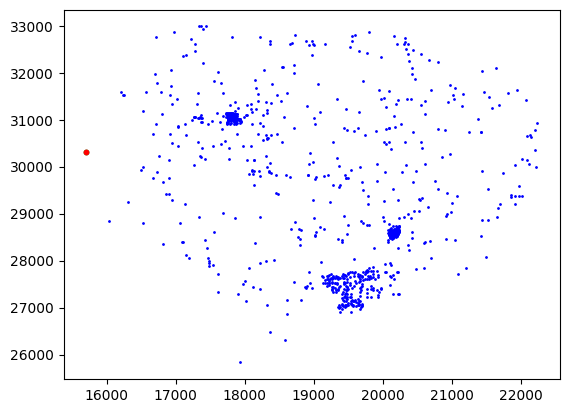

In [104]:
if __name__ == "__main__":
    g = Graph(9)
    g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
               [4, 0, 8, 0, 0, 0, 0, 11, 0],
               [0, 8, 0, 7, 0, 4, 0, 0, 2],
               [0, 0, 7, 0, 9, 14, 0, 0, 0],
               [0, 0, 0, 9, 0, 10, 0, 0, 0],
               [0, 0, 4, 14, 10, 0, 2, 0, 0],
               [0, 0, 0, 0, 0, 2, 0, 1, 6],
               [8, 11, 0, 0, 0, 0, 1, 0, 7],
               [0, 0, 2, 0, 0, 0, 6, 7, 0]
               ]

    g.dijkstra(0)

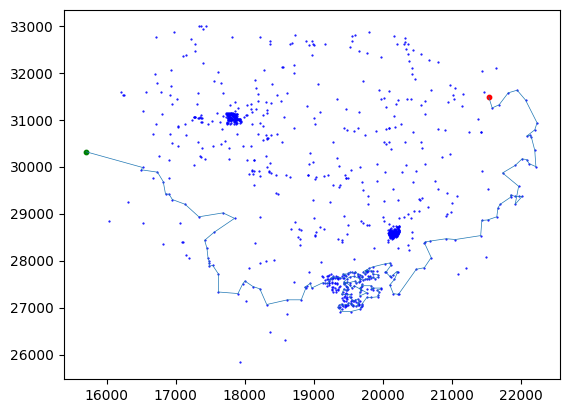

In [114]:
g = Graph(929)
g.graph = box
g.dijkstra(0)